In [121]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

import math

In [119]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

import math

X = torch.tensor([
    [0,1,2],
    [0,2,1],
    [1,0,2],
    [1,2,0],
    [2,0,1],
    [2,1,0],
]).float()

y = torch.tensor([
    0,1,2,3,4,5
]).float()

net = nn.Sequential(

    nn.Linear(3,4),
    nn.ReLU(),
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,1)

    
)
# act = nn.LeakyReLU(.1)
# act = nn.Tanh()

optimizer = torch.optim.AdamW(net.parameters(), lr=1e-3)

loss_fn = nn.MSELoss()

epochs = 10_000

for epoch in range(epochs):
    
    preds = net(X).squeeze()
    
    loss = loss_fn(preds, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % (epochs // 10) == 0:
        print(loss.item())

6.844996929168701
0.046463001519441605
0.004621873144060373
0.0002993129601236433
5.532426712306915e-06
1.264405966594495e-07
3.553930127964122e-08
1.3113260699526563e-08
4.677274123565667e-09
1.6813697101270009e-09


In [120]:
print(f"{net(torch.tensor([1,2,0]).float()).item():.3f}")

3.000


In [199]:
X = torch.tensor([
    [0,1],
    [1,0]
]).float()

y = torch.tensor([
    1,2
]).float()

net = nn.Sequential(
    nn.Linear(2,1, bias=False)
)

myOpt = torch.optim.AdamW(net.parameters(), lr=1e-3)

loss_fn = nn.MSELoss()

epochs = 10_000

for epoch in range(epochs):
    
    preds = net(X).squeeze()
    
    loss = loss_fn(preds, y)
    
    myOpt.zero_grad()
    loss.backward()
    myOpt.step()
    
    if epoch % (epochs // 10) == 0:
        print(loss.item())

1.753921627998352
0.3928869962692261
0.054120730608701706
0.0025952954310923815
5.7024535635719076e-05
7.635519068571739e-06
2.516291488063871e-06
8.825706458992499e-07
3.1537632594336173e-07
1.1463625071428396e-07


In [200]:
round(net(torch.tensor([1,0]).float()).item(), 3)

2.0

In [201]:
print(net[0].weight.data.numpy())

[[1.9997128  0.99997133]]


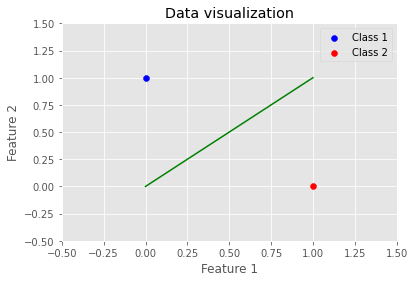

In [205]:
import matplotlib.pyplot as plt

X = torch.tensor([
    [0,1],
    [1,0]
]).float()

y = torch.tensor([
    1,2
]).float()

# Scatter plot for each class in different colors
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y==2][:, 0], X[y==2][:, 1], color='red', label='Class 2')

# To help visualize linear separability, we'll draw a separating line that's in between and perpendicular to the line connecting the points
# The midpoint of the two points is (0.5, 0.5) and since the line connecting them has slope -1, the perpendicular line will have slope 1
# So, the equation of the perpendicular bisector will be y = x
plt.plot([0, 1], [0, 1], color='green', linestyle='-')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data visualization')
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.grid(True)
plt.show()


In [234]:
X = torch.tensor([
    [1],
    [2],
    [4]
]).float()

y = torch.tensor([
    1,4,16
]).float()

net = nn.Sequential(
    nn.Linear(1,1)
#     nn.Linear(1,1, bias=False)
)

myOpt = torch.optim.AdamW(net.parameters(), lr=1e-3)

loss_fn = nn.MSELoss()

epochs = 10_0000

for epoch in range(epochs):
    
    preds = net(X).squeeze()
    
    loss = loss_fn(preds, y)
    
    myOpt.zero_grad()
    loss.backward()
    myOpt.step()
    
    if epoch % (epochs // 10) == 0:
        print(loss.item())

97.05965423583984
1.4481364488601685
0.857143223285675
0.8571427464485168
0.857142984867096
0.8571426868438721
0.8571428656578064
0.8571428656578064
0.857142984867096
0.8571429252624512


In [237]:
round(net(torch.tensor([2]).float()).item(), 3)

5.286

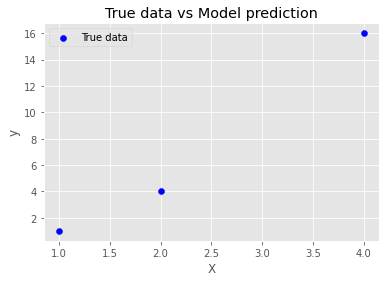

17.967863082885742


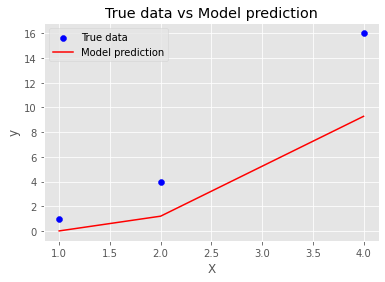

0.4728955030441284


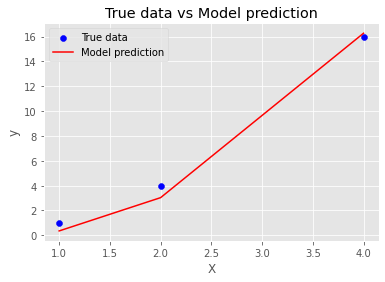

0.21280862390995026


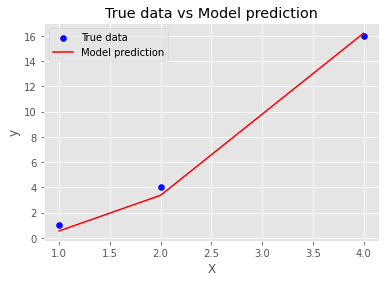

0.039888784289360046


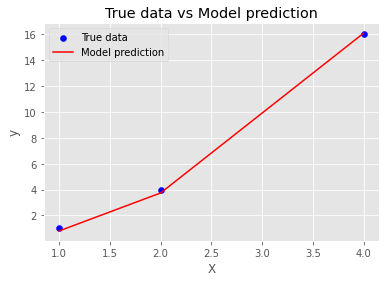

0.0014115566154941916


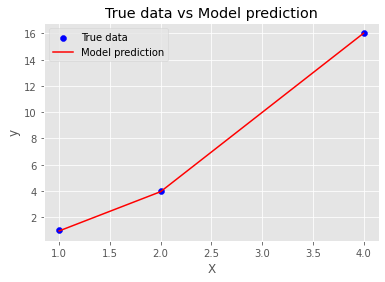

1.0844715916391579e-06


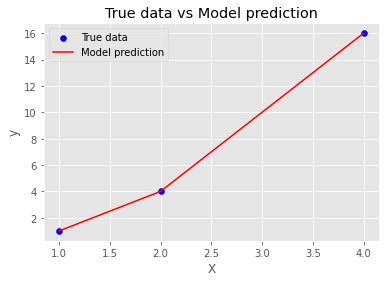

4.1405837691854686e-06


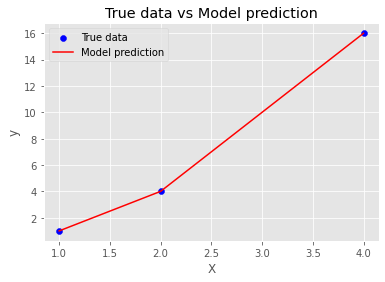

1.4326145674203872e-06


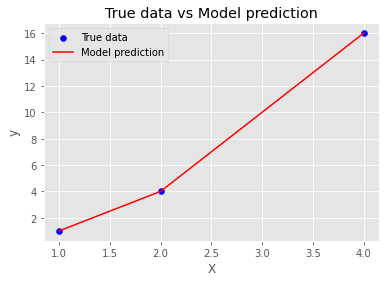

5.032217131883954e-07


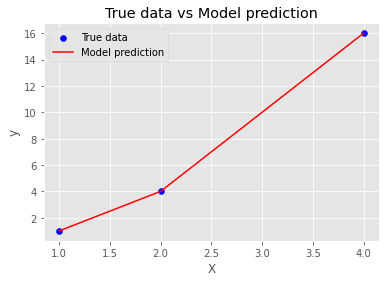

1.7957626141651417e-07


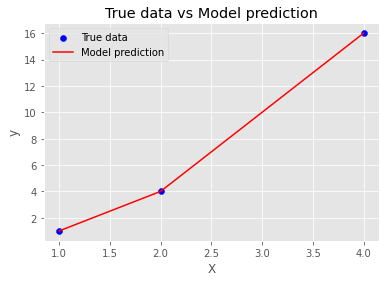

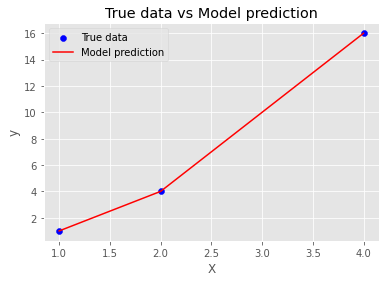

In [249]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Assuming the given data and model definition is already here...

class squaredFunction(nn.Module):
    def forward(self, x):
        return x**2

net = nn.Sequential(
    nn.Linear(1,1),
    squaredFunction()
    
#     nn.Linear(1,1, bias=False)
)

myOpt = torch.optim.AdamW(net.parameters(), lr=1e-3)

# Create a function to plot data
def plot_data_and_preds(X, y, preds=None):
    plt.scatter(X.numpy(), y.numpy(), color='blue', label='True data')
    
    if preds is not None:
        plt.plot(X.numpy(), preds.detach().numpy(), color='red', label='Model prediction')
        
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('True data vs Model prediction')
    plt.grid(True)
    plt.show()

# Initial plot
plot_data_and_preds(X, y)


epochs = 10000

for epoch in range(epochs):
    
    preds = net(X).squeeze()
    
    loss = loss_fn(preds, y)
    
    myOpt.zero_grad()
    loss.backward()
    myOpt.step()
    
    if epoch % (epochs // 10) == 0:
        print(loss.item())
        plot_data_and_preds(X, y, preds)

# Final plot after training
plot_data_and_preds(X, y, preds)


In [246]:
round(net(torch.tensor([2]).float()).item(), 3)

5.539